In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [8]:
# Load dataset from a sample URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
data = pd.read_excel(url, engine='openpyxl')

# Save dataset locally in CSV format
data.to_csv('customer_purchase_data.csv', index=False)

# Provide download link for dataset
from google.colab import files
files.download('customer_purchase_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
# Data cleaning
# Dropping rows with missing values and removing canceled transactions
data = data.dropna()
data = data[data['Quantity'] > 0]
data = data[data['UnitPrice'] > 0]

# Creating a new column for TotalPurchase
data['TotalPurchase'] = data['Quantity'] * data['UnitPrice']

# Aggregating data by CustomerID
customer_data = data.groupby('CustomerID').agg({
    'TotalPurchase': 'sum',
    'Quantity': 'sum',
    'InvoiceNo': 'nunique'
}).rename(columns={'InvoiceNo': 'NumTransactions'}).reset_index()

# Standardizing features
scaler = StandardScaler()
customer_data_scaled = scaler.fit_transform(customer_data[['TotalPurchase', 'Quantity', 'NumTransactions']])

# Display processed data
pd.DataFrame(customer_data_scaled, columns=['TotalPurchase', 'Quantity', 'NumTransactions']).head()

,TotalPurchase,Quantity,NumTransactions
0,8.358668,14.473038,-0.425097
1,0.250966,0.251058,0.354417
2,-0.028596,0.227869,-0.035340
3,-0.033012,-0.111047,-0.425097
4,-0.191347,-0.197065,-0.425097


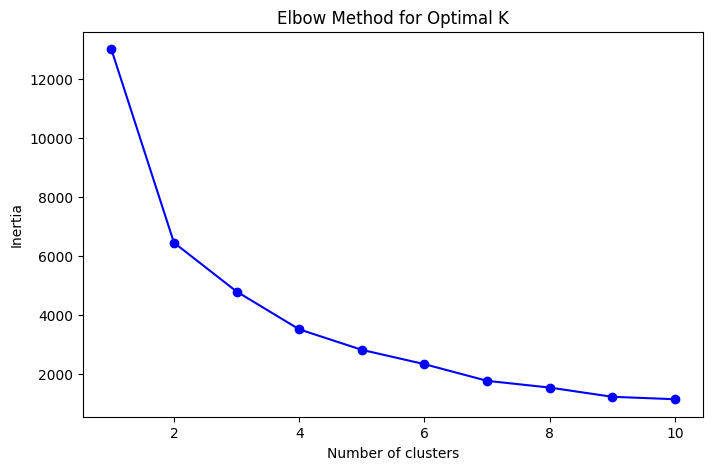

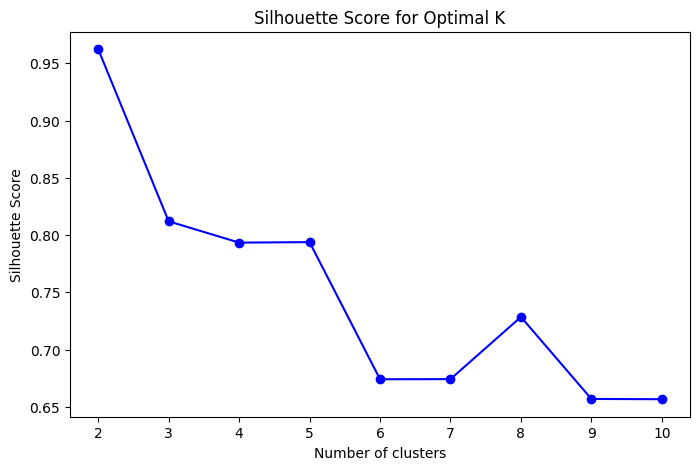

In [4]:
# Using the Elbow method to find the optimal number of clusters
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customer_data_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

# Using silhouette score for further validation
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customer_data_scaled)
    silhouette_scores.append(silhouette_score(customer_data_scaled, kmeans.labels_))

# Plotting silhouette scores
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal K')
plt.show()

In [5]:
# Applying K-Means with optimal K
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_data['Cluster'] = kmeans.fit_predict(customer_data_scaled)

# Display first few rows of the data with clusters
customer_data.head()

,CustomerID,TotalPurchase,Quantity,NumTransactions,Cluster
0,12346.0,77183.60,74215,1,1
1,12347.0,4310.00,2458,7,0
2,12348.0,1797.24,2341,4,0
3,12349.0,1757.55,631,1,0
4,12350.0,334.40,197,1,0


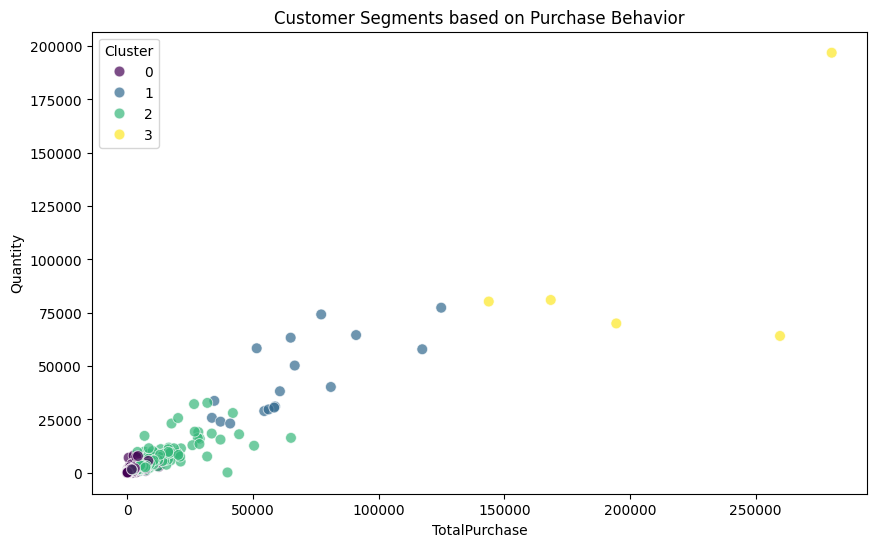

In [6]:
# Plotting clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=customer_data,
    x='TotalPurchase', y='Quantity',
    hue='Cluster', palette='viridis', s=60, alpha=0.7
)
plt.title('Customer Segments based on Purchase Behavior')
plt.show()

In [7]:
# Save clustered data to CSV for download
customer_data.to_csv('customer_segments.csv', index=False)

# Display download link
from google.colab import files
files.download('customer_segments.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>